In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [2]:
df =pd.read_csv('adult.data',sep=',',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
names =['age',
        'workclass',
        'fnlwgt',
        'education',
        'education-num',
        'marital-status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'capital-gain',
        'capital-loss',
        'hours-per-week',
        'native-country','income']

In [5]:
df.columns=names

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df2=df.copy()

In [8]:
df2.columns =df2.columns.str.replace('-','_')

In [9]:
df2['income']=df2['income'].str.lstrip()

In [10]:
df2['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [11]:
df2['income']=df2['income'].map({'<=50K':0,'>50K':1})

In [12]:
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [13]:
df2=df2.replace(' ?',np.nan)

In [14]:
df2.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

# Ordinal Encoding

In [15]:
df3=df2.copy()

In [16]:
labels_ordered= df3['education'].value_counts().sort_values().index
labels_ordered ={k:i for i,k in enumerate(labels_ordered,0) }
labels_ordered

{' Preschool': 0,
 ' 1st-4th': 1,
 ' 5th-6th': 2,
 ' Doctorate': 3,
 ' 12th': 4,
 ' 9th': 5,
 ' Prof-school': 6,
 ' 7th-8th': 7,
 ' 10th': 8,
 ' Assoc-acdm': 9,
 ' 11th': 10,
 ' Assoc-voc': 11,
 ' Masters': 12,
 ' Bachelors': 13,
 ' Some-college': 14,
 ' HS-grad': 15}

In [17]:
lables=['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
for i in lables:
    labels_ordered= df3[i].value_counts().sort_values().index
    labels_ordered ={k:i for i,k in enumerate(labels_ordered,0) }
    df3[i]=df3[i].map(labels_ordered)

In [18]:
df3

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,4.0,77516,13,13,5,10.0,4,4,1,2174,0,40,40.0,0
1,50,6.0,83311,13,13,6,11.0,5,4,1,0,0,13,40.0,0
2,38,7.0,215646,15,9,4,5.0,4,4,1,0,0,40,40.0,0
3,53,7.0,234721,10,7,6,5.0,5,3,1,0,0,40,40.0,0
4,28,7.0,338409,13,13,6,13.0,1,3,0,0,0,40,32.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,7.0,257302,9,12,6,3.0,1,4,0,0,0,38,40.0,0
32557,40,7.0,154374,15,9,6,7.0,5,4,1,0,0,40,40.0,1
32558,58,7.0,151910,15,9,2,10.0,2,4,0,0,0,40,40.0,0
32559,22,7.0,201490,15,9,5,10.0,3,4,1,0,0,20,40.0,0


In [19]:
df3.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

# Handle missing value

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


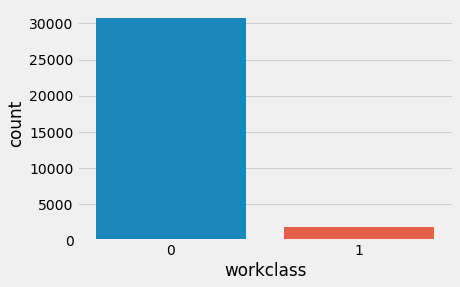

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


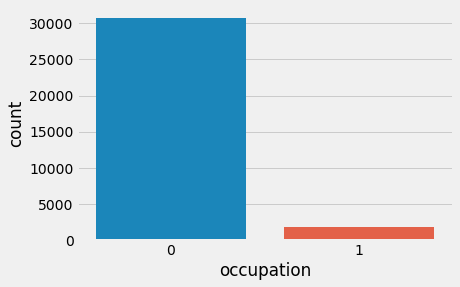

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


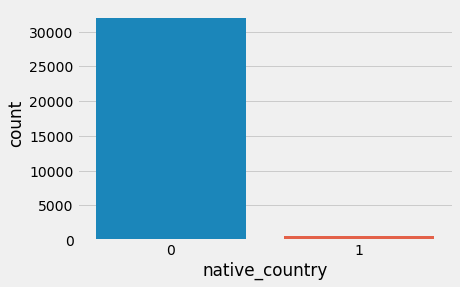

In [20]:
data = df3.copy()
for i in ['workclass','occupation','native_country']:
    data[i]=np.where(data[i].isnull(),1,0)
    sns.countplot(data[i])
    plt.show()

In [21]:
df4=df3.copy()

In [22]:
for i in ['workclass','occupation','native_country']:
    df4[i]=df4[i].fillna(df4[i].median())

In [23]:
df4.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [24]:
df4

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,4.0,77516,13,13,5,10.0,4,4,1,2174,0,40,40.0,0
1,50,6.0,83311,13,13,6,11.0,5,4,1,0,0,13,40.0,0
2,38,7.0,215646,15,9,4,5.0,4,4,1,0,0,40,40.0,0
3,53,7.0,234721,10,7,6,5.0,5,3,1,0,0,40,40.0,0
4,28,7.0,338409,13,13,6,13.0,1,3,0,0,0,40,32.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,7.0,257302,9,12,6,3.0,1,4,0,0,0,38,40.0,0
32557,40,7.0,154374,15,9,6,7.0,5,4,1,0,0,40,40.0,1
32558,58,7.0,151910,15,9,2,10.0,2,4,0,0,0,40,40.0,0
32559,22,7.0,201490,15,9,5,10.0,3,4,1,0,0,20,40.0,0


# Feature Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(df4),columns=df4.columns)

In [26]:
scaled_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,0.571429,0.044302,0.866667,0.800000,0.833333,0.769231,0.8,1.00,1.0,0.021740,0.0,0.397959,1.0,0.0
1,0.452055,0.857143,0.048238,0.866667,0.800000,1.000000,0.846154,1.0,1.00,1.0,0.000000,0.0,0.122449,1.0,0.0
2,0.287671,1.000000,0.138113,1.000000,0.533333,0.666667,0.384615,0.8,1.00,1.0,0.000000,0.0,0.397959,1.0,0.0
3,0.493151,1.000000,0.151068,0.666667,0.400000,1.000000,0.384615,1.0,0.75,1.0,0.000000,0.0,0.397959,1.0,0.0
4,0.150685,1.000000,0.221488,0.866667,0.800000,1.000000,1.000000,0.2,0.75,0.0,0.000000,0.0,0.397959,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,1.000000,0.166404,0.600000,0.733333,1.000000,0.230769,0.2,1.00,0.0,0.000000,0.0,0.377551,1.0,0.0
32557,0.315068,1.000000,0.096500,1.000000,0.533333,1.000000,0.538462,1.0,1.00,1.0,0.000000,0.0,0.397959,1.0,1.0
32558,0.561644,1.000000,0.094827,1.000000,0.533333,0.333333,0.769231,0.4,1.00,0.0,0.000000,0.0,0.397959,1.0,0.0
32559,0.068493,1.000000,0.128499,1.000000,0.533333,0.833333,0.769231,0.6,1.00,1.0,0.000000,0.0,0.193878,1.0,0.0


In [27]:
scaled_data.to_csv('cleaned_train.csv',index=False)